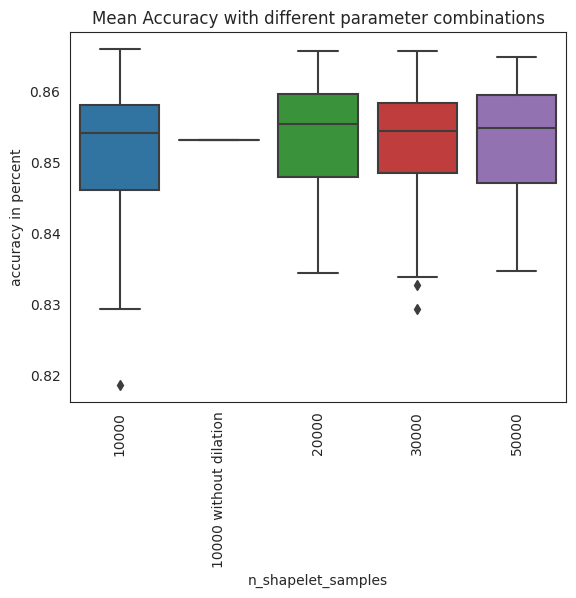

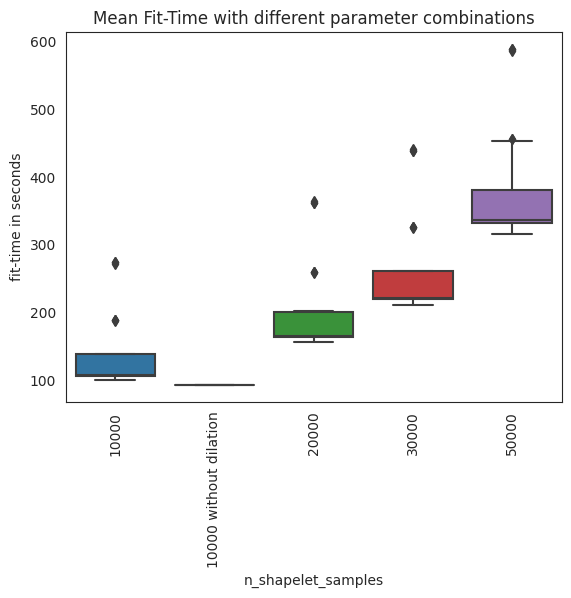

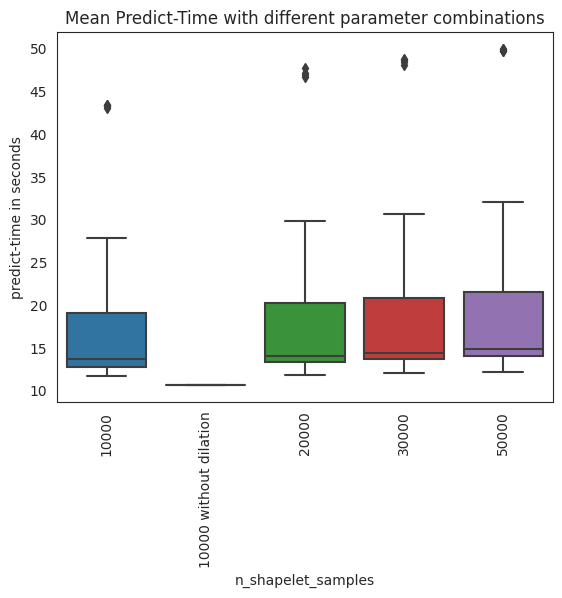

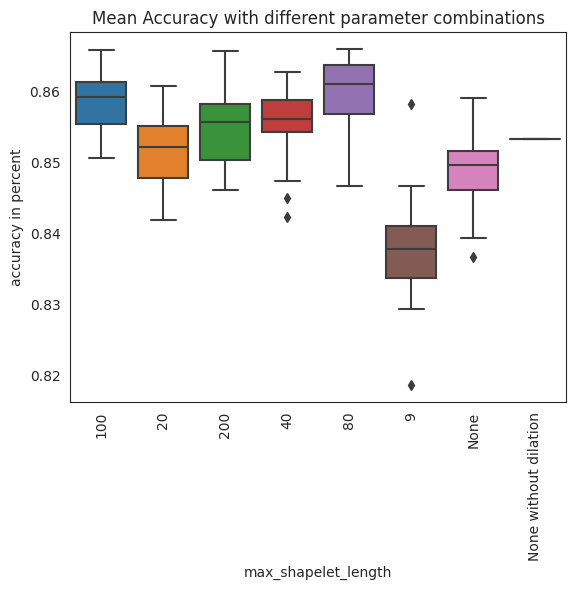

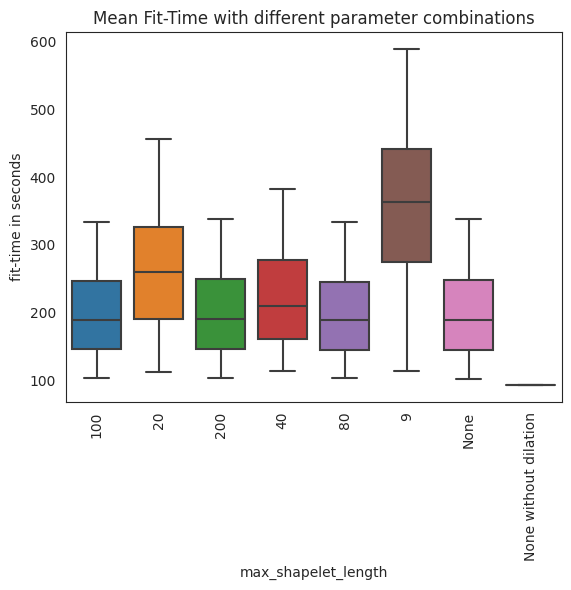

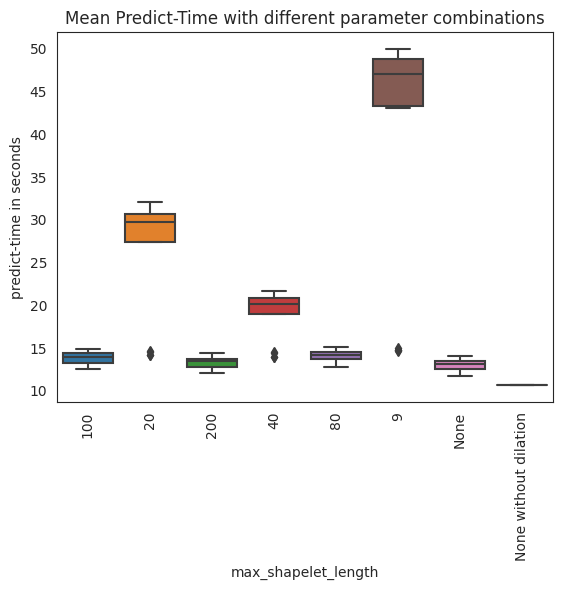

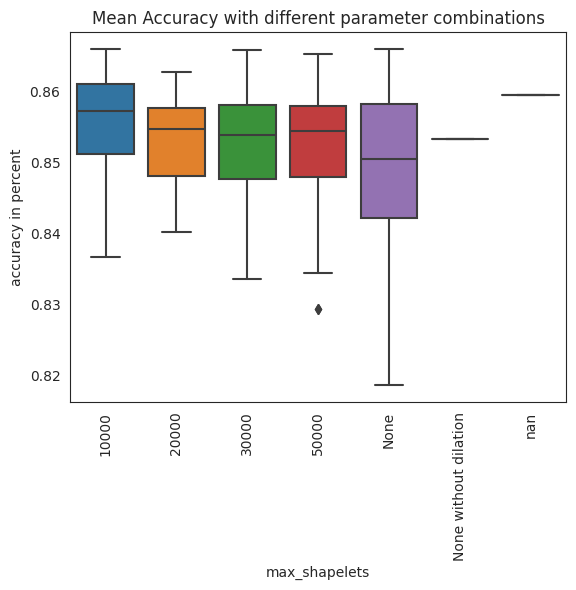

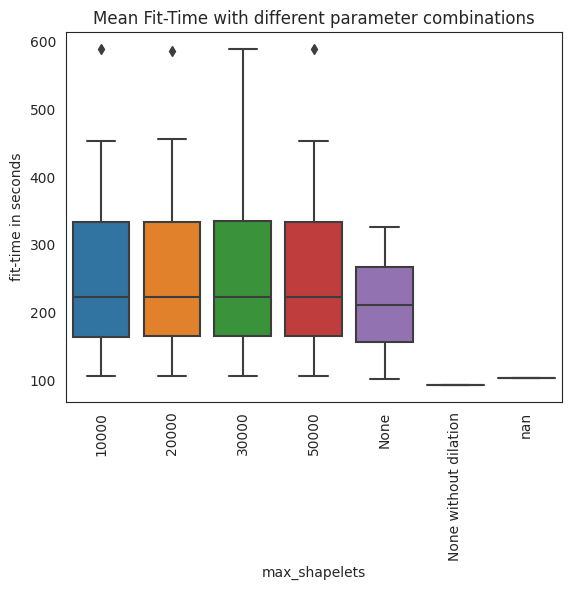

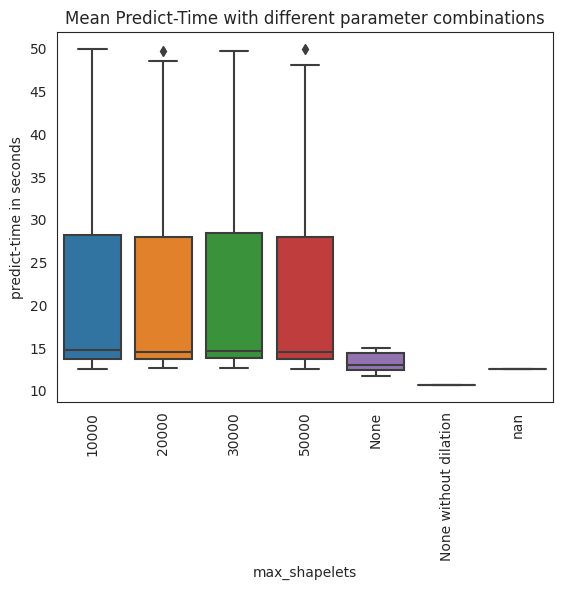

<Figure size 640x480 with 0 Axes>

In [5]:
from typing import List
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("STC_BULK_av.csv")
#df['num_of_random_dilations_per_window'] = df['num_of_random_dilations_per_window'].astype(int)

def bulk_visualize(base_column: str):
    df.sort_values(by=[base_column], inplace = True)
    df_grouped = df.groupby(base_column, dropna=False)

    acc_dict = {}
    fit_dict = {}
    predict_dict = {}

    for group_name, df_group in df_grouped:
        boxplot_name = df_group[base_column].iat[0]
        acc_dict[boxplot_name] = df_group['Accuracy']
        fit_dict[boxplot_name] = df_group['Fit-Time']
        predict_dict[boxplot_name] = df_group['Predict-Time']

    acc_dfs = pd.DataFrame(acc_dict)
    sns.set_style('white')
    sns.despine()
    sns.boxplot(data=acc_dfs).set_title('Mean Accuracy with different parameter combinations')
    plt.xlabel(base_column)
    plt.ylabel("accuracy in percent")
    plt.xticks(rotation=90)
    plt.savefig("./" + base_column + "_acc.png", bbox_inches="tight")
    plt.show()
    plt.clf()

    fit_dfs = pd.DataFrame(fit_dict)
    sns.boxplot(data=fit_dfs).set_title('Mean Fit-Time with different parameter combinations')
    plt.xlabel(base_column)
    plt.ylabel("fit-time in seconds")
    plt.xticks(rotation=90)
    plt.savefig("./" + base_column + "_fit.png", bbox_inches="tight")
    plt.show()
    plt.clf()

    predict_dfs = pd.DataFrame(predict_dict)
    sns.boxplot(data=predict_dfs).set_title('Mean Predict-Time with different parameter combinations')
    plt.xlabel(base_column)
    plt.ylabel("predict-time in seconds")
    plt.xticks(rotation=90)
    plt.savefig("./" + base_column + "_predict.png", bbox_inches="tight")
    plt.show()
    plt.clf()

parameters = ["n_shapelet_samples",
        "max_shapelet_length",
        "max_shapelets",]

for parameter in parameters:
    bulk_visualize(parameter)